In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
df = pd.read_csv('houseprice.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [45]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [46]:
df = df.drop(columns='LotFrontage',axis=1)

In [47]:
df.shape

(1460, 80)

In [48]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0        1          60       RL     8450   Pave   NaN      Reg         Lvl   
1        2          20       RL     9600   Pave   NaN      Reg         Lvl   
2        3          60       RL    11250   Pave   NaN      IR1         Lvl   
3        4          70       RL     9550   Pave   NaN      IR1         Lvl   
4        5          60       RL    14260   Pave   NaN      IR1         Lvl   
...    ...         ...      ...      ...    ...   ...      ...         ...   
1455  1456          60       RL     7917   Pave   NaN      Reg         Lvl   
1456  1457          20       RL    13175   Pave   NaN      Reg         Lvl   
1457  1458          70       RL     9042   Pave   NaN      Reg         Lvl   
1458  1459          20       RL     9717   Pave   NaN      Reg         Lvl   
1459  1460          20       RL     9937   Pave   NaN      Reg         Lvl   

     Utilities LotConfig  ...

In [49]:
df = df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

In [50]:
df.dropna(inplace=True)

In [51]:
df.shape

(575, 75)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>

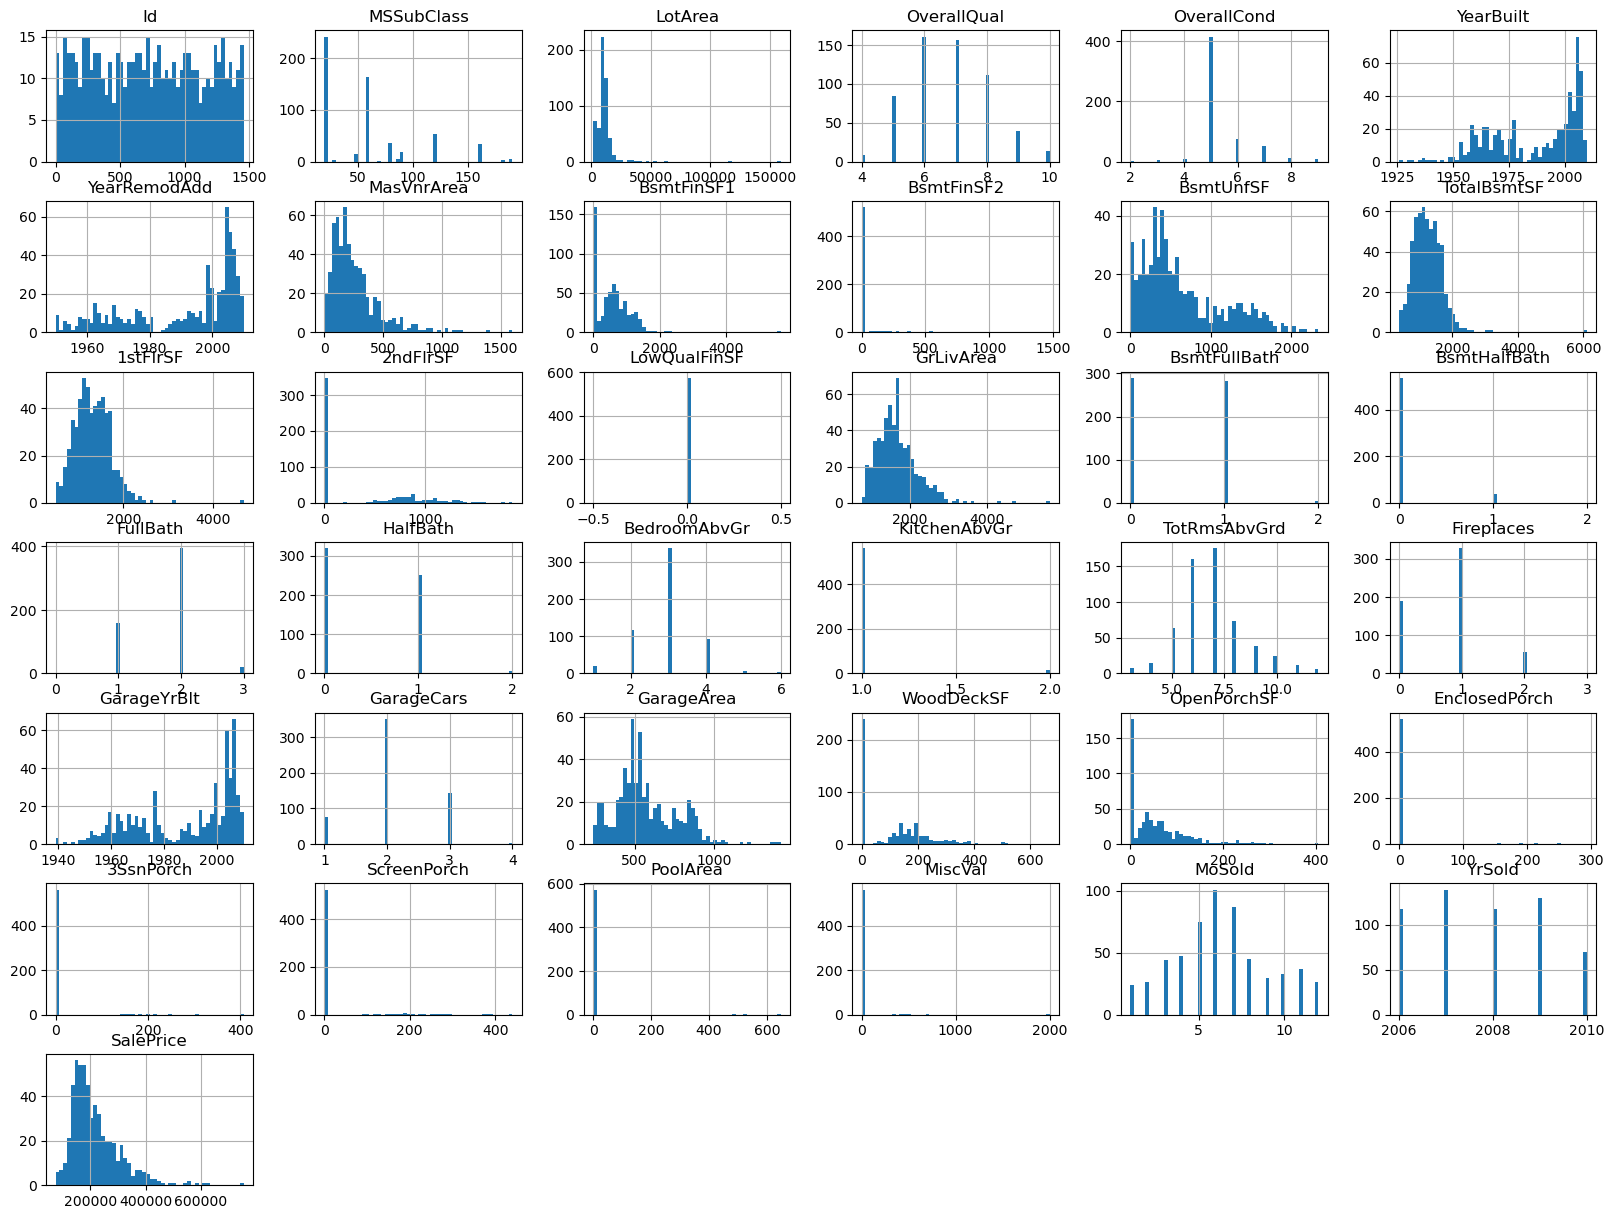

In [52]:
df.hist(bins=50,figsize=(20,15))

In [53]:
df_temp = df.select_dtypes(include=["int64","float64"]) 

In [54]:
X = df_temp.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
X

array([[-1.69301862,  0.04448058, -0.26092355, ..., -0.12707994,
        -1.55993179,  0.13834364],
       [-1.6883002 ,  0.04448058,  0.03643764, ..., -0.12707994,
         0.93657933,  0.13834364],
       [-1.68358178,  0.04448058,  0.35610092, ..., -0.12707994,
         2.00651266,  0.13834364],
       ...,
       [ 1.73019567, -0.885568  , -0.1746888 , ..., -0.12707994,
        -0.48999846,  0.89593978],
       [ 1.73255488,  2.83462634, -0.76803058, ..., -0.12707994,
        -0.48999846, -1.37684864],
       [ 1.74199172, -0.885568  ,  0.24087346, ..., -0.12707994,
        -1.55993179,  1.65353593]])

In [57]:
y

0       208500
2       223500
4       250000
6       307000
7       200000
         ...  
1446    157900
1447    240000
1451    287090
1452    145000
1456    210000
Name: SalePrice, Length: 575, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)
y_pred

array([153448.13015522, 264763.40486581, 238204.81566669, 191253.1701607 ,
       306567.33498965, 326669.8293211 , 183924.86367825, 136025.29002136,
       288315.88144215, 220492.83199414, 323072.99331564, 199915.19392147,
       186043.3225567 , 282346.92438096, 127348.38560467, 297711.10843568,
       240955.24750074, 165217.35825902, 199770.30334309, 137491.04129501,
        79100.5980748 , 110383.09596748, 173858.06575141, 127503.17217546,
       304003.60708578, 301167.28254888, 270115.16972324, 211979.63309006,
       179863.89842249, 318163.70086021, 159455.78587214, 348792.13799274,
       249343.74316228, 145188.92588619, 120593.8945743 , 182806.84467025,
       356369.83175265, 278001.83458132, 306731.22739729, 232891.04696913,
       181547.13450025, 307096.53517856, 114023.51696117, 332082.20756926,
       257547.07489867, 174339.95307795, 340435.86285567, 227957.17034054,
       291343.81228048, 132780.21971008, 117298.26366658, 154367.76345552,
       245444.47996145, 2

In [62]:
y

0       208500
2       223500
4       250000
6       307000
7       200000
         ...  
1446    157900
1447    240000
1451    287090
1452    145000
1456    210000
Name: SalePrice, Length: 575, dtype: int64

In [63]:
lr_score = model.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)

Accuracy:  0.873428521297432
